<a href="https://colab.research.google.com/github/Ajeet-kumar1/Neural-Network-based-project/blob/main/Attendence_system_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

mount drtive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
cd  '/content/drive/MyDrive/Training Images'

/content/drive/MyDrive/Training Images


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2

In [ ]:



data_dir1="//content/drive/MyDrive/Training Images/*.jpg"
images = [cv2.imread(file) for file in glob.glob(data_dir1)]
image_count = len(list(images))

print(image_count)


0


In [ ]:
data_dir="/content/drive/MyDrive/Training Images"
batch_size = 72
img_height = 150
img_width = 150
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size= batch_size)

Found 217 files belonging to 3 classes.
Using 174 files for training.
Found 217 files belonging to 3 classes.
Using 43 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['AJEET', 'MANEESH', 'PRASHANT']


In [ ]:
train_ds

<BatchDataset shapes: ((None, 150, 150, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [ ]:

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    
  ]
)

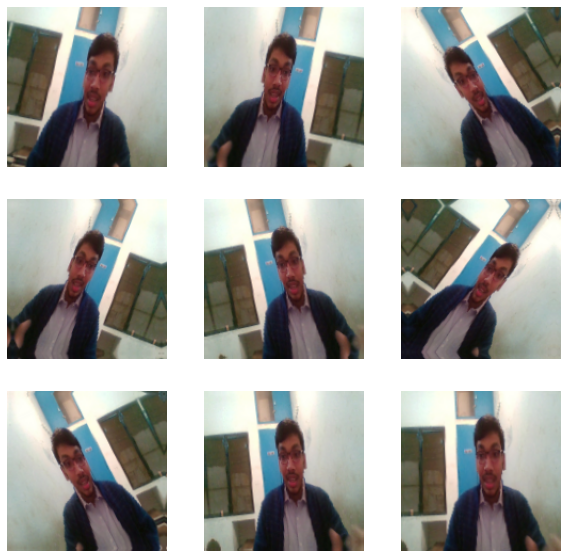

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
num_classes = 4
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.4),
  layers.Dense(4,activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 150, 150, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                      

In [ ]:
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 18s 4s/step - loss: 2.8216 - accuracy: 0.2816 - val_loss: 1.1137 - val_accuracy: 0.4884
Epoch 2/100
3/3 [==============================] - 0s 79ms/step - loss: 1.6742 - accuracy: 0.3736 - val_loss: 1.2110 - val_accuracy: 0.2558
Epoch 3/100
3/3 [==============================] - 0s 71ms/step - loss: 1.2231 - accuracy: 0.3333 - val_loss: 1.3349 - val_accuracy: 0.2558
Epoch 4/100
3/3 [==============================] - 0s 66ms/step - loss: 1.2119 - accuracy: 0.4080 - val_loss: 1.3408 - val_accuracy: 0.2558
Epoch 5/100
3/3 [==============================] - 0s 68ms/step - loss: 1.2017 - accuracy: 0.3506 - val_loss: 1.2700 - val_accuracy: 0.2558
Epoch 6/100
3/3 [==============================] - 0s 66ms/step - loss: 1.1368 - accuracy: 0.3736 - val_loss: 1.2217 - val_accuracy: 0.2558
Epoch 7/100
3/3 [==============================] - 0s 84ms/step - loss: 1.1312 - accuracy: 0.3851 - val_loss: 1.1866 - val_accuracy: 0.2558
Epoch 8/100
3/3 [================

In [ ]:
! pip install livelossplot

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot import PlotLossesKerasTF

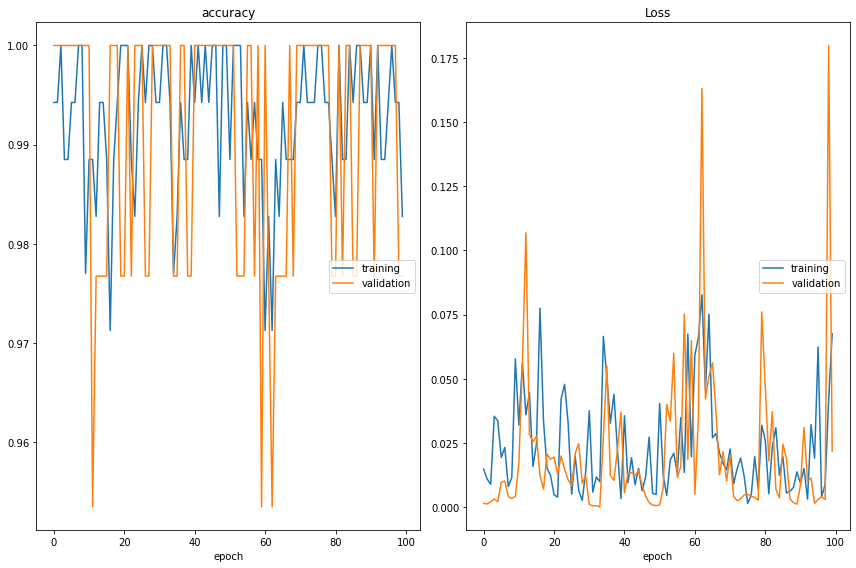

accuracy
	training         	 (min:    0.971, max:    1.000, cur:    0.983)
	validation       	 (min:    0.953, max:    1.000, cur:    0.977)
Loss
	training         	 (min:    0.001, max:    0.083, cur:    0.068)
	validation       	 (min:    0.000, max:    0.180, cur:    0.022)

Epoch 00100: saving model to model_weights.h5
10/10 [==============================] - 1s 98ms/step - loss: 0.0675 - accuracy: 0.9828 - val_loss: 0.0218 - val_accuracy: 0.9767


In [ ]:
#batch_size=10
epochs = 100
#steps_per_epoch = train_generator.n//train_generator.batch_size
#validation_steps = validation_generator.n//validation_generator.batch_size

#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              #patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesKerasTF(), checkpoint]#, #reduce_lr]

history = model.fit(
    x=train_ds,
    #steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = val_ds,
    #validation_steps = validation_steps,
    callbacks=callbacks
)

In [ ]:
model.save('Ajeet 1.h5')
print('model saved')

model saved


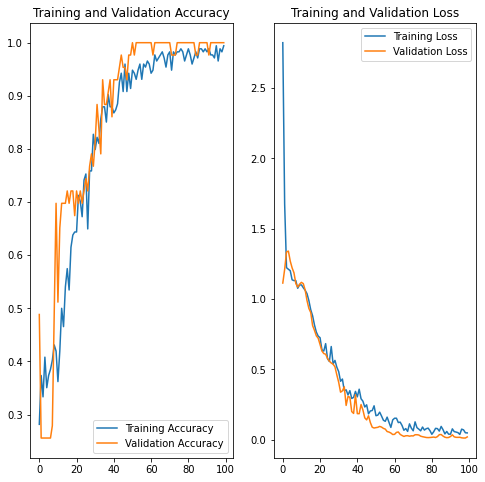

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
path=  '/content/drive/MyDrive/My documents/My pictures/ajeet query pg'#'/content/drive/My Drive/attendance_system/naman kharbanda/facial_recognition_000880_0.png'
img = keras.preprocessing.image.load_img(
    path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
predictions

This image most likely belongs to PRASHANT with a 47.47 percent confidence.


array([[7.8240568e-08, 2.0557696e-03, 9.9794418e-01, 3.1289940e-10]],
      dtype=float32)

In [ ]:

from PIL import Image
import numpy as np
img_w, img_h = 200, 200
data = predictions
#data[100, 100] = [255, 0, 0]
img = Image.fromarray(data, 'RGB')
img.save('test.png')
img.show()

NameError: ignored

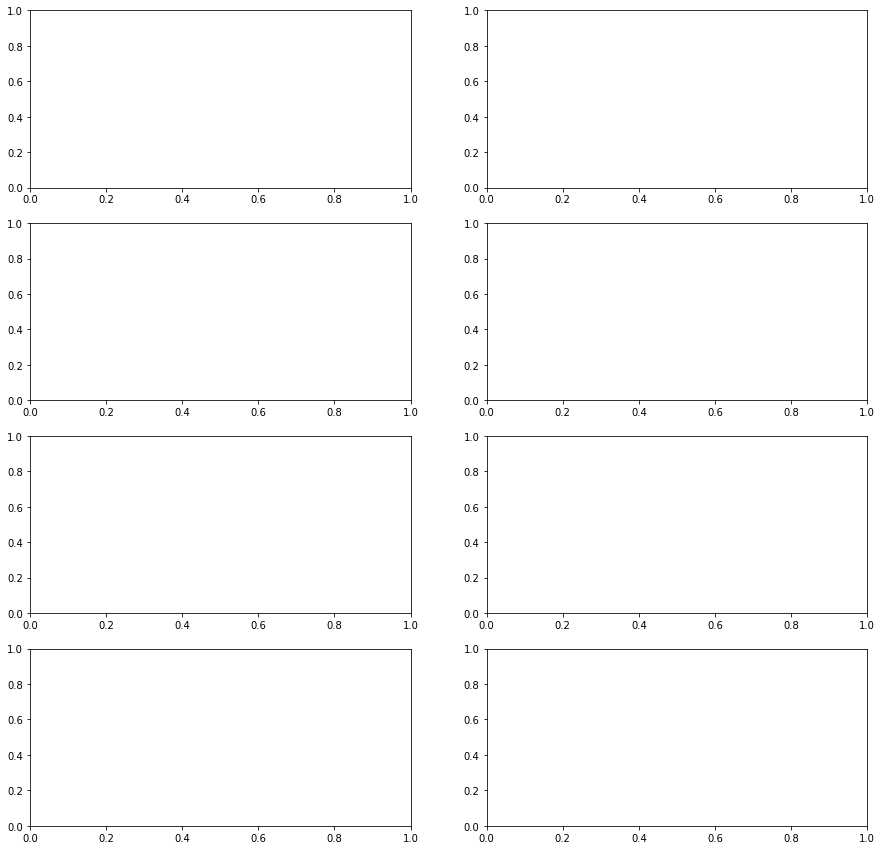

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(val_ds[prop_class[count]])
        ax[i,j].set_title("Predicted Face : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Face : "+str(le.inverse_transform(np.argmax([y_test[prop_class[count]]]))))
        plt.tight_layout()
        count+=1